In [48]:
import cv2
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPooling2D,Flatten,Activation,Dropout
from keras.models import load_model
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [49]:
img = cv2.imread('D:/computer_vision/DATA/NEBULA_GALAXY/test/NEBULA/143008802.jpg')
img = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)


input_shape = (150,150,3)
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )


In [50]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [51]:
batch_size = 16 

train_image_gen = image_gen.flow_from_directory('D:/computer_vision/DATA/NEBULA_GALAXY/train/',
                                                 target_size=input_shape[:2],
                                                batch_size=batch_size, class_mode='binary')
test_image_gen = image_gen.flow_from_directory('D:/computer_vision/DATA/NEBULA_GALAXY/test/', target_size=input_shape[:2],
                                                batch_size=batch_size, class_mode='binary')
train_image_gen.class_indices

Found 385 images belonging to 2 classes.
Found 152 images belonging to 2 classes.


{'GALAXY': 0, 'NEBULA': 1}

In [52]:
train_image_gen.class_indices
results = model.fit_generator(train_image_gen,epochs=4,steps_per_epoch=1000,validation_data=test_image_gen,validation_steps=12)

Epoch 1/4
1000/1000 [==============================] - 302s 302ms/step - loss: 0.5369 - acc: 0.7156 - val_loss: 0.5539 - val_acc: 0.7763
Epoch 2/4
1000/1000 [==============================] - 316s 316ms/step - loss: 0.3854 - acc: 0.8247 - val_loss: 0.5105 - val_acc: 0.8026
Epoch 3/4
1000/1000 [==============================] - 312s 312ms/step - loss: 0.2375 - acc: 0.9022 - val_loss: 0.8124 - val_acc: 0.8355
Epoch 4/4
1000/1000 [==============================] - 321s 321ms/step - loss: 0.1743 - acc: 0.9322 - val_loss: 0.8145 - val_acc: 0.8947


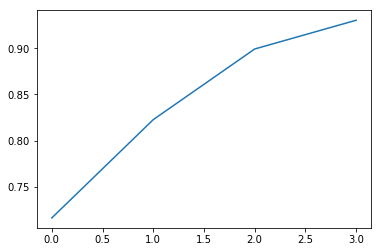

In [53]:
results.history['acc']
plt.plot(results.history['acc'])

In [63]:
model.save('first_space.h5')
new_model = load_model('first_space.h5')

##predict

image_test = 'D:/computer_vision/DATA/cv_test_final.jpg'

from keras.preprocessing import image
final_test_img = image.load_img(image_test,target_size=(150,150))
final_test_img = image.img_to_array(final_test_img)

final_test_img = np.expand_dims(final_test_img,axis=0)
final_test_img = final_test_img/255

model.predict_classes(final_test_img)


array([[0]])

In [64]:
model.predict(final_test_img)

array([[0.48834348]], dtype=float32)